In [1]:
import torch  # PyTorch 라이브러리를 임포트합니다. PyTorch는 딥러닝 프레임워크로서 텐서 연산을 지원하며, 딥러닝 모델을 구축하고 학습시키는 데 사용됩니다.
import torchvision  # PyTorch의 비전 처리 라이브러리인 torchvision을 임포트합니다. torchvision은 이미지 데이터셋 및 일반적인 이미지 변환을 제공합니다.
import torchvision.transforms as transforms  # torchvision.transforms 모듈을 transforms로 별칭하여 임포트합니다. 데이터 변환을 위한 함수와 클래스를 포함합니다.
import torch.nn as nn  # PyTorch의 신경망 관련 모듈인 torch.nn을 임포트합니다. 신경망 모델을 정의하는 데 사용됩니다.
import torch.optim as optim  # PyTorch의 최적화 알고리즘을 제공하는 torch.optim을 임포트합니다. 모델의 가중치를 업데이트하는 데 사용됩니다.
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib의 pyplot 모듈을 임포트합니다. 그래프를 그리고 이미지를 표시하는 데 사용됩니다.
import numpy as np  # 수치 연산을 위한 넘파이 라이브러리를 임포트합니다. 다차원 배열과 연산을 제공하며, 데이터 처리 및 변환에 사용됩니다.


100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



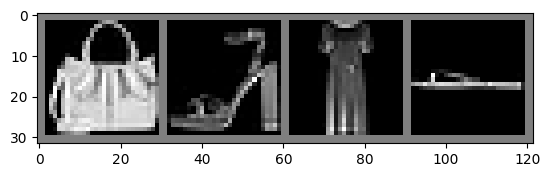

  Bag Sandal Dress Sandal


In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# 데이터 전처리 위해  변환 파이프라인 정의 -> 여기서는 이미지를 텐서로 변환하고 정규화 수행

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
# FashionMNIST 데이터셋 로드 / 훈련 데이터셋(train=True)을 사용하며, 데이터를 다운로드하고(transform=transform) 정의한 변환 적용

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
# DataLoader를 사용하여 데이터를 배치로 나누고, 섞고, 로드합니다. 여기서는 배치 크기를 4로 지정하고(shuffle=True) 데이터 섞음

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
# 클래스 레이블을 정의 -> FashionMNIST 데이터셋에 10개의 클래스

def imshow(img):
    img = img / 2 + 0.5  # 이미지를 언노말라이즈합니다.
    npimg = img.numpy()  # 이미지를 넘파이 배열로 변환합니다.
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # 이미지 시각화/ 채널 순서를 변경하여 RGB 형식으로 변환
    plt.show()  # 이미지를 화면에 출력합니다.

images, labels = next(iter(trainloader))
# 훈련 데이터로더에서 첫 번째 배치의 데이터, 레이블 가져옴

imshow(torchvision.utils.make_grid(images))
# 가져온 이미지를 그리드 형태로 시각화

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
# 각 이미지에 대한 정답 클래스 레이블 출력


In [3]:
import torch.nn.functional as F
# 신경망의 활성화 함수를 포함하는 torch.nn.functional을 F로 import

class Cnn(nn.Module):
    # CNN 모델을 정의하는 클래스.
    def __init__(self):
        super(Cnn, self).__init__()
        # 모델의 구조를 초기화.
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 신경망의 순전파(forward) 연산을 정의
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Cnn()
# CNN 모델을 인스턴스화

criterion = nn.CrossEntropyLoss()
# Cross Entropy 손실 함수를 criterion으로 정의.

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# 확률적 경사하강법(SGD)을 사용하여 최적화를 설정. 학습률은 0.001, 모멘텀은 0.9

for epoch in range(2):  # 데이터셋을 여러번 반복
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        # 변화도(Gradient) -> 0

        outputs = net(inputs)
        # 순전파(forward) 단계를 실행.
        
        loss = criterion(outputs, labels)
        # 손실 계산

        loss.backward()
        # 역전파 단계를 실행 후 기울기를 계산

        optimizer.step()
        # 최적화 단계를 실행 후 매개변수를 업데이트

        running_loss += loss.item()
        # 통계 출력을 위해 손실을 더함

        if i % 2000 == 1999:  # 미니배치 단위로 출력
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('훈련완료!')
# 훈련 완료를 알림


[1,  2000] loss: 1.332
[1,  4000] loss: 0.657
[1,  6000] loss: 0.559
[1,  8000] loss: 0.494
[1, 10000] loss: 0.460
[1, 12000] loss: 0.461
[1, 14000] loss: 0.434
[2,  2000] loss: 0.392
[2,  4000] loss: 0.387
[2,  6000] loss: 0.364
[2,  8000] loss: 0.363
[2, 10000] loss: 0.359
[2, 12000] loss: 0.351
[2, 14000] loss: 0.350
Finished Training


In [4]:
# FashionMNIST 테스트 데이터셋을 로드합니다.
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 테스트 데이터를 미니배치로 나누고 섞어서 로드하는 데이터 로더를 생성합니다.
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

# 정확도 계산을 위한 변수 초기화
correct = 0  # 맞게 예측한 이미지 수
total = 0    # 전체 이미지 수

# 그래디언트를 계산하지 않도록 설정하여 성능 향상을 위해 torch.no_grad() 컨텍스트 매니저를 사용합니다.
with torch.no_grad():
    # 테스트 데이터셋에 대해 반복하여 예측합니다.
    for data in testloader:
        images, labels = data  # 이미지와 레이블을 가져옵니다.
        outputs = net(images)  # 신경망에 이미지를 전달하여 예측값을 얻습니다.
        _, predicted = torch.max(outputs.data, 1)  # 예측값에서 가장 높은 확률을 갖는 클래스를 선택합니다.
        total += labels.size(0)  # 전체 이미지 수를 업데이트합니다.
        correct += (predicted == labels).sum().item()  # 정답과 예측이 일치하는 경우를 카운트합니다.

# 전체 테스트 데이터셋에 대한 정확도를 계산하여 출력합니다.
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

# 각 클래스에 대한 정확도를 계산하여 출력합니다.
class_correct = list(0. for i in range(10))  # 각 클래스에 대한 맞은 개수를 저장하는 리스트 초기화
class_total = list(0. for i in range(10))    # 각 클래스에 대한 전체 개수를 저장하는 리스트 초기화

# 그래디언트를 계산하지 않도록 설정하여 성능 향상을 위해 torch.no_grad() 컨텍스트 매니저를 사용합니다.
with torch.no_grad():
    # 테스트 데이터셋에 대해 반복하여 예측합니다.
    for data in testloader:
        images, labels = data  # 이미지와 레이블을 가져옵니다.
        outputs = net(images)  # 신경망에 이미지를 전달하여 예측값을 얻습니다.
        _, predicted = torch.max(outputs, 1)  # 예측값에서 가장 높은 확률을 갖는 클래스를 선택합니다.
        c = (predicted == labels).squeeze()   # 정답과 예측이 일치하는지


Accuracy of the network on the 10000 test images: 85 %
Accuracy of T-shirt/top : 90 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 84 %
Accuracy of Dress : 85 %
Accuracy of  Coat : 79 %
Accuracy of Sandal : 90 %
Accuracy of Shirt : 48 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 94 %
Accuracy of Ankle boot : 89 %
